# A Brief Overview of Monte Carlo Simulation

### Presenter: Demetrius Taylor

## Outline
1. History of Monte Carlo Simulation
2. Mathematical Foundations
3. Monte Carlo Variants
4. Variance Reduction Methods
5. Working Examples
6. Conclusion

# History of Monte Carlo Simulation

## Brief History (1 of 2)

Monte Carlo Simulation was developed in the 1940's by physicist Stanislaw Ulam and mathematician John von Neumann

Used to model model neutron diffusion for nuclear weapons development as part of the Manhattan Project during World War II

Stanislaw Ulam | John von Neumann
- | -
<img src="ulam.jpeg" width="700" /> | <img src="vonneumann.jpg" width="600" />

## Brief History (2 of 2)

The name was inspired by the Monte Carlo Casino in Monaco due to the method's reliance on random numbers

"Monaco on the French Riviera" | "Casino de Monte-Carlo (aka The Monte Carlo Casino)"
- | -
![alt text](monaco.jpg) | ![alt text](montecarlo.jpg)

# Mathematical Foundations

## Mathematical Foundations (1 of 4)

When we run a Monte Carlo simulation we usually want to approximate an expected value

$$\mu = \mathbb{E}[f(X)]$$

We do this by drawing $n$ independent random samples $X_1, \ldots, X_n$ from the distribution of $X$ and computing the sample mean

$$\hat{\mu}_{n} = \frac{1}{n} \sum_{i=1}^n f(X_i) \approx \mathbb{E}[f(X)]$$

Since we know from class that the expectation is basically an integral, any quantity expressible as an integral can be estimated this way

## Mathematical Foundations (2 of 4)

The justification of Monte Carlo estimators is the Strong Law of Large Numbers (Kolmogorov, 1933)

Let $(\Omega,\mathcal F,\mathbb P)$ be a probability space and $f\!:\!\Omega\to\mathbb R$ with $f\in L^1$

$$\frac1n\sum_{i=1}^n f(X_i) \xrightarrow{\text{a.s.}} \mathbb{E}[f(X)]$$

## Mathematical Foundations (3 of 4)

Additionally, since we use independent random samples that have finite non-zero variances, we know that the resulting distribution of our estimates will be approximately *normal*

$$ X_i = X_1, X_2, \dotsc \qquad \mathbb{E}[X_i] = \mu \qquad \operatorname{Var}(X_i) = \sigma^{2} \in (0,\infty)$$

This will be the case regardless of what the underlaying distribution of $X$ is

## Mathematical Foundations (4 of 4)

The justification that the resulting estimates will follow a normal distribution is the Central Limit Theorem (Laplace, 1810)

Let $X_1, X_2, \dotsc$ be independent, identically distributed random variables with

$$\mathbb{E}[X_i] = \mu \qquad \operatorname{Var}(X_i) = \sigma^{2} \in (0,\infty)$$

If we define the standardized sum $Z_n$ then as $n \to \infty$

$$Z_n = \frac{\,\sum_{i=1}^{n} X_i - n\mu}{\sigma\sqrt{n}} \;\xrightarrow{\;\mathcal{D}\;}\; \mathcal{N}(0,1)$$


# Monte Carlo Variants

## Monte Carlo Variants (1 of 6)
### "Crude" Monte Carlo Simulation

The most common type of Monte Carlo simulation is typically referred to as "crude" (aka "simple" or "naive") Monte Carlo simulation

The goal if this variant is to approximate an expected value or an integral of the form

$$\mu \;=\; \mathbb{E}_{X\sim p}[f(X)] \;=\; \int_{\Omega} f(x)\,p(x)\,dx$$



## Monte Carlo Variants (2 of 6)

This method us used when $\mu$ is difficult or impossible to compute analytically

It generates

- Estimate: $\hat{\mu}_n$

- Standard Error: $\displaystyle \frac{\hat{\sigma}}{\sqrt{n}}$, where $\hat{\sigma}^2$ is the sample variance of $f(X_i)$

## Monte Carlo Variants (3 of 6)
### Markov Chain Monte Carlo Simulation (MCMC)

Markov‑Chain Monte Carlo is a family of algorithms for sampling randomly from a complicated probability distribution when you cannot draw independent samples directly

It combines both

1. Markov chains – a random walk whose next step depends only on the current state, not on the whole past

2. Monte Carlo – estimating integrals or expectations using random samples

## Monte Carlo Variants (4 of 6)
Two of the most famous and widely used MCMC algorithms are

1. The Metropolis–Hastings algorithm

$$P(x,y)=q(x,y) \alpha(x,y) \qquad \alpha(x,y)=\min{1,\frac{\pi(y)q(y,x)}{\pi(x)q(x,y)}}$$


2. Gibbs sampling

$$X_{k}^{(t+1)} \sim \pi \left( x_{k} | x_{−k}^{(t)} \right)$$


## Monte Carlo Variants (5 of 6)
### Sequential Monte Carlo Simulation (SMC)

Sequential Monte Carlo (SMC), also called "particle filtering", is sort of like Monte Carlo *on the fly*

Instead of drawing one big batch of random samples and keeping them forever, SMC keeps a "cloud of particles" that move and change weights as new information arrives

At every time‑step the cloud is adjusted so that, as a group, the particles behave like random draws from the "current" probability distribution we care about

## Monte Carlo Variants (6 of 6)

A typical SMC model

$$
\begin{aligned}
x_0 &\sim p(x_0) &\text{(initial state)}\\
x_t &\sim f(x_t\mid x_{t-1}) &\text{(state evolution)}\\
y_t &\sim g(y_t\mid x_t) &\text{(noisy observation)}
\end{aligned}
$$

For $i=1,\dots,N$ particles

$$
w_t^{(i)} \;=\;
w_{t-1}^{(i)}\;
\frac{\,g\bigl(y_t\mid x_t^{(i)}\bigr)\,f\bigl(x_t^{(i)}\mid x_{t-1}^{(i)}\bigr)}
     {q_t\!\bigl(x_t^{(i)}\mid x_{0:t-1}^{(i)},y_{0:t}\bigr)}
$$

# Variance Reduction Methods

## Variance Reduction Methods (1 of 5)

The purpose of variance reductions methods is to essentially reduce $\sigma^2$ without increasing $n$

In essence, this provides you with either the same level of accuracy in your result by using far fewer samples or higher accuracy for the same cost

Also, note that each technique is unbiased and independent of the others, as such you can often combine two or more different methods for extra "power"

Overall, they yield faster convergence, tighter confidence intervals, and less computing time for the same precision

There are four classic variance reduction techniques...

## Variance Reduction Methods (2 of 5)

### 1. Antithetic variates

Works by using pairs of negatively correlated samples so their errors cancel

1. Generate a random number: $U\sim\text{Uniform}(0,1)$

2. Create its “mirror”: $\tilde U = 1-U$

3. Evaluate both: $f(U),\;f(\tilde U)$

4. Average them:

   $$
   \hat{\mu}_{\text{anti}}=\frac{f(U)+f(\tilde U)}{2}
   $$

Because $U$ and $1-U$ are *negatively correlated*, upward errors in one tend to be balanced by downward errors in the other, often halving the variance or better for monotone $f$

An analogy would be if you guess too high on one coin‑flip and then guess low on its opposite and they sort of cancel each other out




## Variance Reduction Methods (3 of 5)

### 2. Control variates

Works by borrowing information from a *related quantity* whose mean you already know

Suppose you can compute $\mathbb{E}[Y]=\nu$ exactly and $Y$ is correlated with $f(X)$

1. Simulate pairs $(f(X_i),Y_i)$
2. Form the *control‑variates estimator*

$$
\hat{\mu}_{\text{cv}}
\;=\;
\bar f
\;-\;
c\,(\bar Y-\nu)
\qquad
\text{with } c^\star=\frac{\operatorname{Cov}(f,Y)}{\operatorname{Var}(Y)}
$$

Choosing $c=c^\star$ gives the minimum variance

$$
\operatorname{Var}(\hat{\mu}_{\text{cv}})=
\bigl(1-\rho^{2}\bigr)\frac{\sigma^{2}}{n}
$$

where $\rho$ is the correlation between $f$ and $Y$

An analogy would be if you know today’s temperature exactly you can use that fact to correct a noisy thermometer reading



## Variance Reduction Methods (4 of 5)

### 3. Importance sampling

Works by sampling more often where $f$ is large and re‑weighting to stay unbiased

The goal is to focus samples where they “matter”

1. Pick an *easy‑to‑sample proposal* density $q(x)$ that puts more mass in important regions

2. Draw $X_i\sim q$

3. Weight each sample by

   $$
   w_i=\frac{p(X_i)}{q(X_i)} \quad (\text{likelihood ratio})
   $$

4. Estimator:

   $$
   \hat{\mu}_{\text{IS}}
   \;=\;
   \frac{1}{n}\sum_{i=1}^{n} f(X_i)w_i
   $$

Unbiased because the weight corrects for sampling from the “wrong” distribution

Variance drops when $q$ ≈ $|f|p$ (ideal but rarely reachable exactly

An analogy would be if rare events drive the result then deliberately looking for them and giving each discovery its correct statistical weight


## Variance Reduction Methods (5 of 5)

### 4. Stratified or Latin hypercube sampling

Works by forcing samples to *cover every region* of the input space evenly

Stratification is accomplished by spliting the input range into $k$ *strata* (equal‑length intervals in 1‑D, equal‑volume boxes in multi‑D)

Then sampling $n_j$ points inside stratum $j$ and use a weighted average:

$$
\hat{\mu}_{\text{strat}}
=\sum_{j=1}^{k} p_j\,\bar f_j
\qquad
p_j=\Pr\{X\text{ falls in stratum }j\}
$$

This ensures every slice is represented

This also yields lower variance, especially when $f$ differs a lot across slices

An analogy would be if you had a variety box of chocolates with the various types of candy grouped together into their own sections and you then took one chocolate from each section of the box instead of blind‑grabbing and maybe missing whole flavours

# Working examples

We will be focusing on "simple" Monte Carlo because it is the easiest variant to both understand and code

Remember that "simple" Monte Carlo works by

1. Drawing *i.i.d.* random samples $X_1,\dots,X_n$ from a distribution $X$

2. Computing $f(X_i)$

3. Returning a estimator $ \mathbb{E}[X_i] \approx \hat\mu_n = \frac1n\sum f(X_i)$.

## Example 1: Estimating $\pi$

In this example, we will be estimating the value of $\pi$ by "throwing darts"

We assume that our target is a circle enclosed by a square of the same diameter

In our case, that means a hit is a value that falls within the circle, and a miss is a value that falls outside the circle

We then select random samples, bounded by the areas of the outer square, and determine which ones are hits versus misses

To make things a bit easier, we split the circle/square into quarters

We can then use our hits to estimate the value of $\pi$

#### Geometric Intuition

1. A *unit circle* has area:

$$
A_{\text{circle}} = \pi r^2 = \pi \cdot 1^2 = \pi
$$

2. A quarter of that circle (in the first quadrant) has area:

$$
A_{\text{quarter}} = \frac{\pi}{4}
$$

3. The square that bounds it from $(0, 0)$ to $(1, 1)$ has area:

$$
A_{\text{square}} = 1
$$

4. The probability that a random point (x, y) in $[0,1]^2$ lies inside the quarter-circle is:

$$
P(x^2 + y^2 < 1) = \frac{\pi}{4}
$$

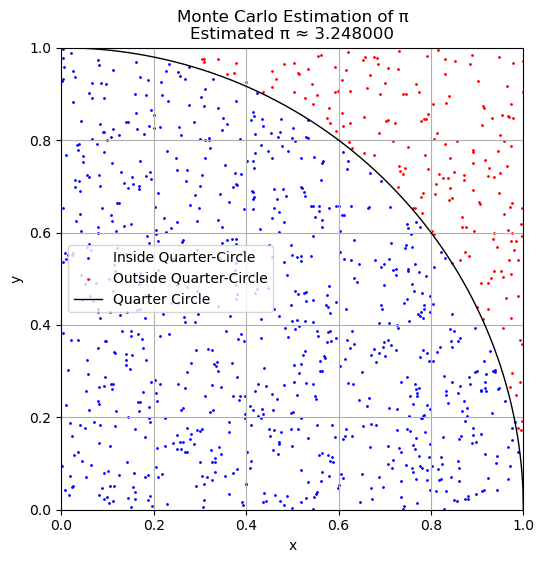

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of points to sample
n_samples = 1_000  # (You can increase this if desired)

# Generate random points in [0, 1] x [0, 1]
x = np.random.rand(n_samples)
y = np.random.rand(n_samples)

# Determine which points are inside the quarter-circle
inside = x**2 + y**2 < 1

# Estimate π
pi_estimate = 4 * np.mean(inside)

# Plot the results
plt.figure(figsize=(6, 6))
plt.scatter(x[inside], y[inside], color='blue', s=1, label='Inside Quarter-Circle')
plt.scatter(x[~inside], y[~inside], color='red', s=1, label='Outside Quarter-Circle')
plt.plot(np.linspace(0, 1, 1000), np.sqrt(1 - np.linspace(0, 1, 1000)**2), color='black', lw=1, label='Quarter Circle')
plt.title(f"Monte Carlo Estimation of π\nEstimated π ≈ {pi_estimate:.6f}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.axis("square")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [1]:
import numpy as np

def mc_pi(n_samples=100_000):
    x = np.random.rand(n_samples)
    y = np.random.rand(n_samples)
    return 4 * np.mean(x**2 + y**2 < 1)

for n in [10**k for k in range(1, 8)]:
    print(f"{n:>10} sample: pi ≈ {mc_pi(n):.10f}")

     10: pi ≈ 3.200000
    100: pi ≈ 3.080000
   1000: pi ≈ 3.120000
  10000: pi ≈ 3.132800
 100000: pi ≈ 3.134040
1000000: pi ≈ 3.140028


### Convergence Plot

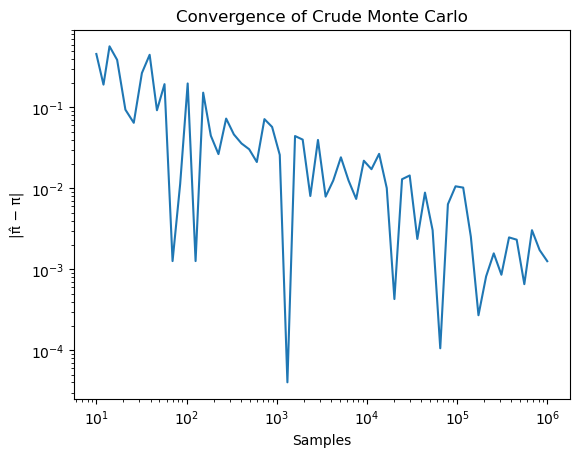

In [2]:
import numpy as np
import matplotlib.pyplot as plt

n_values = np.logspace(1, 6, 60, dtype=int)
errors = [abs(mc_pi(n) - np.pi) for n in n_values]
plt.loglog(n_values, errors)
plt.xlabel("Samples")
plt.ylabel("|π̂ − π|")
plt.title("Convergence of Crude Monte Carlo")
plt.show()

## Example 2: Antithetic Variates

In [3]:
def mc_pi_antithetic(n_samples=100_000):
    half = n_samples // 2
    x = np.random.rand(half)
    y = np.random.rand(half)
    x2 = 1 - x
    y2 = 1 - y
    inside = np.concatenate(((x**2 + y**2) < 1, (x2**2 + y2**2) < 1))
    return 4 * inside.mean()

for n in [10**k for k in range(1, 7)]:
    crude = mc_pi(n)
    anti = mc_pi_antithetic(n)
    print(f"{n:>7}: crude {crude:.6f}    antithetic {anti:.6f}")

     10: crude 2.800000    antithetic 3.200000
    100: crude 3.000000    antithetic 2.920000
   1000: crude 3.076000    antithetic 3.152000
  10000: crude 3.159600    antithetic 3.142800
 100000: crude 3.140000    antithetic 3.149320
1000000: crude 3.141460    antithetic 3.139708


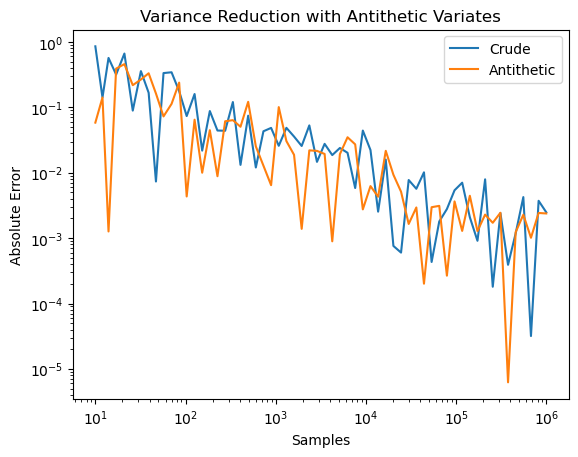

In [4]:
n_values = np.logspace(1, 6, 60, dtype=int)
errors_crude = [abs(mc_pi(n) - np.pi) for n in n_values]
errors_anti = [abs(mc_pi_antithetic(n) - np.pi) for n in n_values]
import matplotlib.pyplot as plt
plt.loglog(n_values, errors_crude, label="Crude")
plt.loglog(n_values, errors_anti, label="Antithetic")
plt.xlabel("Samples")
plt.ylabel("Absolute Error")
plt.title("Variance Reduction with Antithetic Variates")
plt.legend()
plt.show()

## Framework: Homework Example 4b

*(Insert problem statement here)*

### Template Code

In [ ]:
# MC solution template for Homework 4b
import numpy as np
# TODO: define problem-specific function f(x)
# TODO: sample from distribution p(x)
# TODO: compute estimator and confidence interval


## Framework: Homework Example 4c

In [ ]:
# MC solution template for Homework 4c
# TODO: implement problem-specific sampling and estimation


## Framework: Homework Example 4d

In [ ]:
# MC solution template for Homework 4d
# TODO: implement problem-specific sampling and estimation


## Conclusion
- MC turns integration into averaging random draws.
- Converges at $n^{-1/2}$; variance reduction & GPUs mitigate computational cost.
- Measure‑theoretic probability provides rigorous guarantees.
- Applications span physics, finance, risk analysis, and beyond.

## References
- Metropolis, N. & Ulam, S. (1949). *The Monte Carlo Method*. JASA.
- Kalos, M. H. & Whitlock, P. A. (2008). *Monte Carlo Methods*. Wiley.
- Robert, C. P. & Casella, G. (2004). *Monte Carlo Statistical Methods*. Springer.
- Glasserman, P. (2003). *Monte Carlo Methods in Financial Engineering*. Springer.
- Owen, A. B. (2013). *Monte Carlo Theory, Methods and Examples*.
- NVIDIA Corporation (2021). *CUDA Programming Guide*.